# Avg Property Value

### Logic:
* Step 1: Use Tax Rate Table to get assessed value.
    * Assessed Value=Property Tax/Tax Rate 
* Step 2: Use Table of Equalized Valuations (TEV)to get value.
    * Property Value = Assessed Value/Equalized Value Ratio 
* Step 3. Group data by:
    * County-Town-Zip to get average property value by zip code.
    * County-Town to get average property valye by town. 

In [1]:
#Import Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Read Owner Occupied Pickle File
input_path_owner = os.path.join("..","Final Output Data","OwnerOccupiedProperty_Data.plk")
input_path_tenant= os.path.join("..","Final Output Data","TenantOccupied_Data.plk")
input_path_tax_rate= os.path.join("","raw data","Tax_Rate_TEV.csv")

In [3]:
#Get Owner Data
owner_df= pd.read_pickle(input_path_owner)
owner_df.head()

,TAX YEAR,MUNICIPALITY,COUNTY,PROPERTY CLASS,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Zip Code
1,2019,BERKELEY HEIGHTS TWP,UNION,RESIDENTIAL,60000,109700,169700,6940.73,07922
3,2019,RIDGEFIELD BORO,BERGEN,RESIDENTIAL,246500,212000,458500,11081.95,07657
6,2019,PISCATAWAY TWP,MIDDLESEX,RESIDENTIAL,213600,249300,462900,10631.31,08854
8,2019,EAST HANOVER TWP,MORRIS,RESIDENTIAL,189100,292200,481300,10949.58,07936
9,2019,PISCATAWAY TWP,MIDDLESEX,RESIDENTIAL,258500,596700,855200,19134.93,08854


In [4]:
#Check data size
owner_df.describe()
owner_df.count()

TAX YEAR                 1926215
MUNICIPALITY             1926215
COUNTY                   1926215
PROPERTY CLASS           1926215
LAND VALUE               1926215
BUILDING VALUE           1926215
NET VALUE                1926215
PRIOR YEAR TAX AMOUNT    1926215
Zip Code                 1761258
dtype: int64

In [5]:
#Read Tenant Occupied Pickle file
tenant_df= pd.read_pickle(input_path_tenant)
tenant_df.head()

,TAX YEAR,MUNICIPALITY,COUNTY,PROPERTY CLASS,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Zip Code
5,2019,BRIGANTINE CITY,ATLANTIC,RESIDENTIAL,249600,223700,473300,8221.22,08203
7,2019,TOMS RIVER TWP,OCEAN,RESIDENTIAL,146600,61300,207900,4893.96,08753
11,2019,SOMERS POINT CITY,ATLANTIC,RESIDENTIAL,68500,171100,229300,7330.13,08244
16,2019,VENTNOR CITY,ATLANTIC,RESIDENTIAL,80000,30000,110000,3405.76,08406
22,2019,GREENWICH TWP,WARREN,RESIDENTIAL,31800,85300,117100,3791.70,08323


In [6]:
#Check data size
tenant_df.describe()


,TAX YEAR,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT
count,640326.0,6.403260e+05,6.403260e+05,6.403260e+05,640326.000000
mean,2019.0,1.591447e+05,1.520122e+05,3.109880e+05,7051.573962
std,0.0,2.842501e+05,1.972368e+05,4.272343e+05,5731.515914
min,2019.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2019.0,3.900000e+04,6.550000e+04,1.222000e+05,3855.600000
50%,2019.0,8.040000e+04,1.104000e+05,2.063000e+05,6037.310000
75%,2019.0,1.750000e+05,1.773000e+05,3.548750e+05,8973.137500
max,2019.0,3.037500e+07,2.965580e+07,4.127060e+07,971896.200000


In [7]:
#Read Tax Rate and Town Equivalance Ratio Value (TEV) CSV File
tax_rate_tev_df = pd.read_csv(input_path_tax_rate)
tax_rate_tev_df.count

<bound method DataFrame.count of        County  Cty/District Code           District  TAX RATE     TEV
0    ATLANTIC                101       ABSECON CITY     3.292   93.96
1    ATLANTIC                102      ATLANTIC CITY     3.533  104.54
2    ATLANTIC                103    BRIGANTINE CITY     1.737   99.20
3    ATLANTIC                104         BUENA BORO     3.107  112.40
4    ATLANTIC                105    BUENA VISTA TWP     2.479  111.40
..        ...                ...                ...       ...     ...
565    WARREN               2119  PHILLIPSBURG TOWN     3.981   97.04
566    WARREN               2120      POHATCONG TWP     3.818   95.42
567    WARREN               2121    WASHINGTON BORO     5.186   80.84
568    WARREN               2122     WASHINGTON TWP     3.512   90.15
569    WARREN               2123          WHITE TWP     2.061   99.41

[570 rows x 5 columns]>

In [8]:
#Function to parse address line
def partAddress(x):
    y=str(x).split(" ")
    if len(y)>=2:
        return y[0]+y[1]
    else:
        return y[0]

In [9]:
#Create Key Using County Name and Partial Address
tenant_add_part = tenant_df["MUNICIPALITY"].apply(partAddress)
tenant_df["County and Partial Address"] = tenant_df["COUNTY"] + tenant_add_part
tenant_df.head()

,TAX YEAR,MUNICIPALITY,COUNTY,PROPERTY CLASS,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Zip Code,County and Partial Address
5,2019,BRIGANTINE CITY,ATLANTIC,RESIDENTIAL,249600,223700,473300,8221.22,08203,ATLANTICBRIGANTINECITY
7,2019,TOMS RIVER TWP,OCEAN,RESIDENTIAL,146600,61300,207900,4893.96,08753,OCEANTOMSRIVER
11,2019,SOMERS POINT CITY,ATLANTIC,RESIDENTIAL,68500,171100,229300,7330.13,08244,ATLANTICSOMERSPOINT
16,2019,VENTNOR CITY,ATLANTIC,RESIDENTIAL,80000,30000,110000,3405.76,08406,ATLANTICVENTNORCITY
22,2019,GREENWICH TWP,WARREN,RESIDENTIAL,31800,85300,117100,3791.70,08323,WARRENGREENWICHTWP


In [10]:
#Create Key Using County Name and Partial Address
owner_add_part = owner_df["MUNICIPALITY"].apply(partAddress)
owner_df["County and Partial Address"] = owner_df["COUNTY"] + owner_add_part
owner_df.head()

,TAX YEAR,MUNICIPALITY,COUNTY,PROPERTY CLASS,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Zip Code,County and Partial Address
1,2019,BERKELEY HEIGHTS TWP,UNION,RESIDENTIAL,60000,109700,169700,6940.73,07922,UNIONBERKELEYHEIGHTS
3,2019,RIDGEFIELD BORO,BERGEN,RESIDENTIAL,246500,212000,458500,11081.95,07657,BERGENRIDGEFIELDBORO
6,2019,PISCATAWAY TWP,MIDDLESEX,RESIDENTIAL,213600,249300,462900,10631.31,08854,MIDDLESEXPISCATAWAYTWP
8,2019,EAST HANOVER TWP,MORRIS,RESIDENTIAL,189100,292200,481300,10949.58,07936,MORRISEASTHANOVER
9,2019,PISCATAWAY TWP,MIDDLESEX,RESIDENTIAL,258500,596700,855200,19134.93,08854,MIDDLESEXPISCATAWAYTWP


In [11]:
#Create Key Using County Name and Partial Address
tev_add_part = tax_rate_tev_df["District"].apply(partAddress)
tax_rate_tev_df["County and Partial Address"] = tax_rate_tev_df["County"] + tev_add_part
tax_rate_tev_df.head()

,County,Cty/District Code,District,TAX RATE,TEV,County and Partial Address
0,ATLANTIC,101,ABSECON CITY,3.292,93.96,ATLANTICABSECONCITY
1,ATLANTIC,102,ATLANTIC CITY,3.533,104.54,ATLANTICATLANTICCITY
2,ATLANTIC,103,BRIGANTINE CITY,1.737,99.20,ATLANTICBRIGANTINECITY
3,ATLANTIC,104,BUENA BORO,3.107,112.40,ATLANTICBUENABORO
4,ATLANTIC,105,BUENA VISTA TWP,2.479,111.40,ATLANTICBUENAVISTA


In [12]:
#Create new Owner Occupied DF with Tax Rate and TEV
owner_tev_df = pd.merge(owner_df,
                 tax_rate_tev_df,
                 on='County and Partial Address', 
                 how='left')
owner_tev_df.head()

,TAX YEAR,MUNICIPALITY,COUNTY,PROPERTY CLASS,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Zip Code,County and Partial Address,County,Cty/District Code,District,TAX RATE,TEV
0,2019,BERKELEY HEIGHTS TWP,UNION,RESIDENTIAL,60000,109700,169700,6940.73,07922,UNIONBERKELEYHEIGHTS,UNION,2001,BERKELEY HEIGHTS TWP,4.090,53.08
1,2019,RIDGEFIELD BORO,BERGEN,RESIDENTIAL,246500,212000,458500,11081.95,07657,BERGENRIDGEFIELDBORO,BERGEN,249,RIDGEFIELD BORO,2.417,80.66
2,2019,PISCATAWAY TWP,MIDDLESEX,RESIDENTIAL,213600,249300,462900,10631.31,08854,MIDDLESEXPISCATAWAYTWP,MIDDLESEX,1217,PISCATAWAY TWP,2.304,93.67
3,2019,EAST HANOVER TWP,MORRIS,RESIDENTIAL,189100,292200,481300,10949.58,07936,MORRISEASTHANOVER,MORRIS,1410,EAST HANOVER TWP,2.275,75.40
4,2019,PISCATAWAY TWP,MIDDLESEX,RESIDENTIAL,258500,596700,855200,19134.93,08854,MIDDLESEXPISCATAWAYTWP,MIDDLESEX,1217,PISCATAWAY TWP,2.304,93.67


In [13]:
#Calculate Property Market Value by Prior Year Tax Amount by Tax Rate and applying TEV Factor
owner_tev_df["Property Market Value"] = (owner_tev_df["PRIOR YEAR TAX AMOUNT"] / (owner_tev_df["TAX RATE"] / 100)) / (owner_tev_df["TEV"] / 100)
owner_tev_df.describe()

,TAX YEAR,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Cty/District Code,TAX RATE,TEV,Property Market Value
count,1942155.0,1.942155e+06,1.942155e+06,1.942155e+06,1.942155e+06,1.942155e+06,1.942155e+06,1.942155e+06,1.942155e+06
mean,2019.0,1.393487e+05,1.874965e+05,3.266941e+05,9.180465e+03,1.164961e+03,3.638820e+00,8.447184e+01,3.853515e+05
std,0.0,1.447705e+05,1.631135e+05,2.739072e+05,5.400923e+03,1.208743e+03,2.754643e+00,2.004998e+01,2.956359e+05
min,2019.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+02,4.880000e-01,1.101000e+01,0.000000e+00
25%,2019.0,5.430000e+04,9.960000e+04,1.682000e+05,5.903240e+03,4.270000e+02,2.298000e+00,8.340000e+01,2.158621e+05
50%,2019.0,1.000000e+05,1.471000e+05,2.615000e+05,8.191260e+03,1.204000e+03,2.903000e+00,9.154000e+01,3.182108e+05
75%,2019.0,1.808000e+05,2.231000e+05,4.006000e+05,1.108286e+04,1.506000e+03,3.789000e+00,9.565000e+01,4.678445e+05
max,2019.0,9.376200e+06,1.377070e+07,1.727070e+07,4.407483e+05,9.999000e+03,2.854300e+01,1.256000e+02,2.129380e+07


In [14]:
#Create new Owner Occupied DF with Tax Rate and TEV
tenant_tev_df = pd.merge(tenant_df,
                 tax_rate_tev_df,
                 on='County and Partial Address', 
                 how='left')
tenant_tev_df.head()

,TAX YEAR,MUNICIPALITY,COUNTY,PROPERTY CLASS,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Zip Code,County and Partial Address,County,Cty/District Code,District,TAX RATE,TEV
0,2019,BRIGANTINE CITY,ATLANTIC,RESIDENTIAL,249600,223700,473300,8221.22,08203,ATLANTICBRIGANTINECITY,ATLANTIC,103,BRIGANTINE CITY,1.737,99.20
1,2019,TOMS RIVER TWP,OCEAN,RESIDENTIAL,146600,61300,207900,4893.96,08753,OCEANTOMSRIVER,OCEAN,9999,TOMS RIVER,2.903,81.57
2,2019,SOMERS POINT CITY,ATLANTIC,RESIDENTIAL,68500,171100,229300,7330.13,08244,ATLANTICSOMERSPOINT,ATLANTIC,121,SOMERS POINT CITY,3.067,101.09
3,2019,VENTNOR CITY,ATLANTIC,RESIDENTIAL,80000,30000,110000,3405.76,08406,ATLANTICVENTNORCITY,ATLANTIC,122,VENTNOR CITY,2.634,91.78
4,2019,GREENWICH TWP,WARREN,RESIDENTIAL,31800,85300,117100,3791.70,08323,WARRENGREENWICHTWP,WARREN,2107,GREENWICH TWP,3.238,97.76


In [15]:
#Calculate Property Market Value by Prior Year Tax Amount by Tax Rate and applying TEV Factor
tenant_tev_df["Property Market Value"] = (tenant_tev_df["PRIOR YEAR TAX AMOUNT"] / (tenant_tev_df["TAX RATE"] / 100)) / (tenant_tev_df["TEV"] / 100)
tenant_tev_df.head()

,TAX YEAR,MUNICIPALITY,COUNTY,PROPERTY CLASS,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Zip Code,County and Partial Address,County,Cty/District Code,District,TAX RATE,TEV,Property Market Value
0,2019,BRIGANTINE CITY,ATLANTIC,RESIDENTIAL,249600,223700,473300,8221.22,08203,ATLANTICBRIGANTINECITY,ATLANTIC,103,BRIGANTINE CITY,1.737,99.20,477116.877449
1,2019,TOMS RIVER TWP,OCEAN,RESIDENTIAL,146600,61300,207900,4893.96,08753,OCEANTOMSRIVER,OCEAN,9999,TOMS RIVER,2.903,81.57,206672.606758
2,2019,SOMERS POINT CITY,ATLANTIC,RESIDENTIAL,68500,171100,229300,7330.13,08244,ATLANTICSOMERSPOINT,ATLANTIC,121,SOMERS POINT CITY,3.067,101.09,236422.989415
3,2019,VENTNOR CITY,ATLANTIC,RESIDENTIAL,80000,30000,110000,3405.76,08406,ATLANTICVENTNORCITY,ATLANTIC,122,VENTNOR CITY,2.634,91.78,140880.283362
4,2019,GREENWICH TWP,WARREN,RESIDENTIAL,31800,85300,117100,3791.70,08323,WARRENGREENWICHTWP,WARREN,2107,GREENWICH TWP,3.238,97.76,119783.205571


In [16]:
#Verify data size and shoukd match 6403260
tenant_tev_df.describe()

,TAX YEAR,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Cty/District Code,TAX RATE,TEV,Property Market Value
count,648670.0,6.486700e+05,6.486700e+05,6.486700e+05,648670.000000,648670.000000,648670.000000,648670.000000,6.486700e+05
mean,2019.0,1.619813e+05,1.527660e+05,3.145804e+05,7044.179688,1140.917872,3.493432,86.766292,3.578622e+05
std,0.0,2.909563e+05,1.985933e+05,4.350640e+05,5725.783476,1314.800045,3.483557,19.190698,4.576808e+05
min,2019.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,101.000000,0.488000,11.010000,0.000000e+00
25%,2019.0,3.920000e+04,6.580000e+04,1.227000e+05,3850.717500,503.000000,2.034000,85.530000,1.515268e+05
50%,2019.0,8.080000e+04,1.108000e+05,2.074000e+05,6026.320000,912.000000,2.818000,92.190000,2.544946e+05
75%,2019.0,1.774000e+05,1.778000e+05,3.581000e+05,8954.422500,1515.000000,3.727000,97.230000,4.099145e+05
max,2019.0,3.037500e+07,2.965580e+07,4.127060e+07,971896.200000,9999.000000,28.543000,125.600000,4.621050e+07


In [17]:
#Export DFs as csv files

owner_tev_df.to_csv("Owner_Property_Tax_MktVal.csv")
tenant_tev_df.to_csv("Tenant_Property_Tax_MktVal.csv")


In [18]:
#Merge both dataframes

tev_dfs = [tenant_tev_df,owner_tev_df]
all_market_property_df = pd.concat(tev_dfs)
all_market_property_df.head()

,TAX YEAR,MUNICIPALITY,COUNTY,PROPERTY CLASS,LAND VALUE,BUILDING VALUE,NET VALUE,PRIOR YEAR TAX AMOUNT,Zip Code,County and Partial Address,County,Cty/District Code,District,TAX RATE,TEV,Property Market Value
0,2019,BRIGANTINE CITY,ATLANTIC,RESIDENTIAL,249600,223700,473300,8221.22,08203,ATLANTICBRIGANTINECITY,ATLANTIC,103,BRIGANTINE CITY,1.737,99.20,477116.877449
1,2019,TOMS RIVER TWP,OCEAN,RESIDENTIAL,146600,61300,207900,4893.96,08753,OCEANTOMSRIVER,OCEAN,9999,TOMS RIVER,2.903,81.57,206672.606758
2,2019,SOMERS POINT CITY,ATLANTIC,RESIDENTIAL,68500,171100,229300,7330.13,08244,ATLANTICSOMERSPOINT,ATLANTIC,121,SOMERS POINT CITY,3.067,101.09,236422.989415
3,2019,VENTNOR CITY,ATLANTIC,RESIDENTIAL,80000,30000,110000,3405.76,08406,ATLANTICVENTNORCITY,ATLANTIC,122,VENTNOR CITY,2.634,91.78,140880.283362
4,2019,GREENWICH TWP,WARREN,RESIDENTIAL,31800,85300,117100,3791.70,08323,WARRENGREENWICHTWP,WARREN,2107,GREENWICH TWP,3.238,97.76,119783.205571


In [19]:
#Drop unneeded columns

all_market_property_df.drop(['TAX YEAR', 'PROPERTY CLASS', 'LAND VALUE','BUILDING VALUE', 'NET VALUE', 'County','Cty/District Code', 'District', 'TAX RATE', 'TEV',"County and Partial Address"], axis=1)

,MUNICIPALITY,COUNTY,PRIOR YEAR TAX AMOUNT,Zip Code,Property Market Value
0,BRIGANTINE CITY,ATLANTIC,8221.22,08203,4.771169e+05
1,TOMS RIVER TWP,OCEAN,4893.96,08753,2.066726e+05
2,SOMERS POINT CITY,ATLANTIC,7330.13,08244,2.364230e+05
3,VENTNOR CITY,ATLANTIC,3405.76,08406,1.408803e+05
4,GREENWICH TWP,WARREN,3791.70,08323,1.197832e+05
...,...,...,...,...,...
1942150,JERSEY CITY CITY,HUDSON,852.62,07310,5.672118e+04
1942151,HAMMONTON TOWN,ATLANTIC,8441.18,08037,3.290250e+05
1942152,MONTCLAIR TWP,ESSEX,13966.32,07042,5.002772e+05
1942153,EDISON TWP,MIDDLESEX,7589.94,08820,3.501995e+05


In [20]:
#Export Final Dataframe

all_market_property_df.to_csv("All_Property_Tax_MktVal.csv")

In [21]:
zip_mkt_val_count = all_market_property_df.groupby(["County","MUNICIPALITY","Zip Code"])["Property Market Value"].count()
zip_mkt_val_count

County    MUNICIPALITY  Zip Code
ATLANTIC  ABSECON CITY   08201      2470
                         08203         4
                         08204         1
                         08205         4
                         08207         1
                                    ... 
WARREN    WHITE TWP      07863       140
                         07882        38
                         08865        15
                        . 0782         1
                        08083        227
Name: Property Market Value, Length: 5594, dtype: int64

In [22]:
#Create Summary Variables at zip level

zip_tax_mean = all_market_property_df.groupby(["County","MUNICIPALITY","Zip Code"])["PRIOR YEAR TAX AMOUNT"].mean()
zip_tax_median = all_market_property_df.groupby(["County","MUNICIPALITY","Zip Code"])["PRIOR YEAR TAX AMOUNT"].median()
zip_mkt_val_mean = all_market_property_df.groupby(["County","MUNICIPALITY","Zip Code"])["Property Market Value"].mean()
zip_mkt_val_median = all_market_property_df.groupby(["County","MUNICIPALITY","Zip Code"])["Property Market Value"].median()
zip_mkt_val_count = all_market_property_df.groupby(["County","MUNICIPALITY","Zip Code"])["Property Market Value"].count() 

#Create Zip Summary DataFrame

zip_tax_mktval_summary = pd.DataFrame({"Property Count":zip_mkt_val_count,"Mean Property Tax":zip_tax_mean,"Median Property Tax":zip_tax_median,"Mean Market Value":zip_mkt_val_mean,"Median Market Value":zip_mkt_val_median})


#Export Zip Summary DF as CSV File

zip_tax_mktval_summary.to_csv("Mkt_Val_Tax_Summary_ZipCode.csv")

zip_tax_mktval_summary.head(100)

Property Count  Mean Property Tax  \
County   MUNICIPALITY Zip Code                                      
ATLANTIC ABSECON CITY  08201              2470        5935.803870   
                       08203                 4        5459.782500   
                       08204                 1        4905.080000   
                       08205                 4        5658.995000   
                       08207                 1        5728.080000   
...                                        ...                ...   
         GALLOWAY TWP  08025                 4        7201.890000   
                       08055                 1        2990.510000   
                       08125                 1        6387.980000   
                       08201                 4        5773.690000   
                       08205              7543        5653.807513   

                                Median Property Tax  Mean Market Value  \
County   MUNICIPALITY Zip Code                                           
ATLANTIC ABSECON CITY  08201               5826.840      191900.765871   
                       08203               6091.845      176511.297561   
                       08204               4905.080      158578.118348   
                       08205               5298.570      182951.711051   
                       08207               5728.080      185185.185185   
...                                             ...                ...   
         GALLOWAY TWP  08025               7413.075      236437.312623   
                       08055               2990.510       98178.137652   
                       08125               6387.980      209716.730510   
                       08201               6441.930      189549.652594   
                       08205               5509.320      185613.922796   

                                Median Market Value  
County   MUNICIPALITY Zip Code                       
ATLANTIC ABSECON CITY  08201          188378.033206  
                       08203          196945.476398  
                       08204          158578.118348  
                       08205          171299.399915  
                       08207          185185.185185  
...                                             ...  
         GALLOWAY TWP  08025          243370.494589  
                       08055           98178.137652  
                       08125          209716.730510  
                       08201          211487.903496  
                       08205          180870.412514  

[100 rows x 5 columns]

In [23]:
#Create Summary Variables at town level

town_tax_mean = all_market_property_df.groupby(["County","MUNICIPALITY"])["PRIOR YEAR TAX AMOUNT"].mean()
town_tax_median = all_market_property_df.groupby(["County","MUNICIPALITY"])["PRIOR YEAR TAX AMOUNT"].median()
town_mkt_val_mean = all_market_property_df.groupby(["County","MUNICIPALITY"])["Property Market Value"].mean()
town_mkt_val_median = all_market_property_df.groupby(["County","MUNICIPALITY"])["Property Market Value"].median()
town_mkt_val_count = all_market_property_df.groupby(["County","MUNICIPALITY"])["Property Market Value"].count()

#Create Zip Summary DataFrame

town_tax_mktval_summary = pd.DataFrame({"Property Count":town_mkt_val_count,"Mean Property Tax":town_tax_mean,"Median Property Tax":town_tax_median,"Mean Market Value":town_mkt_val_mean,"Median Market Value":town_mkt_val_median})


#Export Zip Summary DF as CSV File

town_tax_mktval_summary.to_csv("Mkt_Val_Tax_Summary_Town.csv")

town_tax_mktval_summary.head()

PermissionError: [Errno 13] Permission denied: 'Mkt_Val_Tax_Summary_Town.csv'

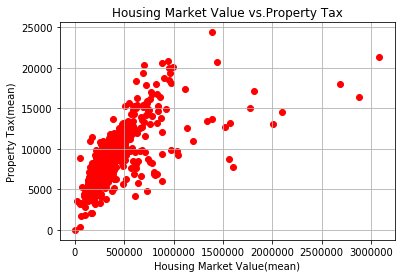

In [54]:
from scipy.stats import linregress
import scipy.stats as stats

#Create Mean Property Tax vs Mean Market Value Scatter Plot

plt.scatter(town_tax_mktval_summary["Mean Market Value"],town_tax_mktval_summary["Mean Property Tax"],c='r')

#Create Chart Title and Axis Titles

plt.title("Housing Market Value vs.Property Tax")
plt.xlabel("Housing Market Value(mean)")
plt.ylabel("Property Tax(mean)")
plt.grid(True)
          
#Save chart as .PNG File
          
plt.savefig('Mkt Val vs Prop Tax Scatter.png')
          
plt.show()

In [28]:
#Identify mean housing value in dataframe
mean_housing_val = town_tax_mktval_summary.iloc[:,4]

#Identify mean property tax in dataframe
mean_propr_tax_val = town_tax_mktval_summary.iloc[:,2]

correlation = stats.pearsonr(mean_housing_val,mean_propr_tax_val)

print(f"The correlation between housing market value and property tax is is {round(correlation[0],2)}")

The correlation between housing market value and property tax is is 0.64


In [41]:
#Create Summary Variables at county level

county_tax_mean = all_market_property_df.groupby(["County"])["PRIOR YEAR TAX AMOUNT"].mean()
county_tax_median = all_market_property_df.groupby(["County"])["PRIOR YEAR TAX AMOUNT"].median()
county_mkt_val_mean = all_market_property_df.groupby(["County"])["Property Market Value"].mean()
county_mkt_val_median = all_market_property_df.groupby(["County"])["Property Market Value"].median()
county_mkt_val_count = all_market_property_df.groupby(["County"])["Property Market Value"].count()

#Create Zip Summary DataFrame

county_tax_mktval_summary = pd.DataFrame({"Property Count":town_mkt_val_count,"Mean Property Tax":town_tax_mean,"Median Property Tax":town_tax_median,"Mean Market Value":town_mkt_val_mean,"Median Market Value":town_mkt_val_median})

#county_tax_mktval_summary.drop(['MUNICIPALITY'], axis=1)

#Export Zip Summary DF as CSV File

county_tax_mktval_summary.to_csv("Mkt_Val_Tax_Summary_county.csv")

county_tax_mktval_summary.head()

Property Count  Mean Property Tax  \
County   MUNICIPALITY                                            
ATLANTIC ABSECON CITY                  3278        5580.447108   
         ATLANTIC CITY CITY           10825        4520.335151   
         BRIGANTINE CITY               8594        6365.360333   
         BUENA BORO                    1304        5561.771511   
         BUENA VISTA TWP               2400        5640.600588   

                             Median Property Tax  Mean Market Value  \
County   MUNICIPALITY                                                 
ATLANTIC ABSECON CITY                   5573.360      180412.307634   
         ATLANTIC CITY CITY             3858.040      122389.596417   
         BRIGANTINE CITY                5373.475      369412.428547   
         BUENA BORO                     5367.450      159259.584623   
         BUENA VISTA TWP                5087.835      204250.736256   

                             Median Market Value  
County   MUNICIPALITY                             
ATLANTIC ABSECON CITY              180183.185937  
         ATLANTIC CITY CITY        104457.732177  
         BRIGANTINE CITY           311848.559344  
         BUENA BORO                153695.249047  
         BUENA VISTA TWP           184234.644623

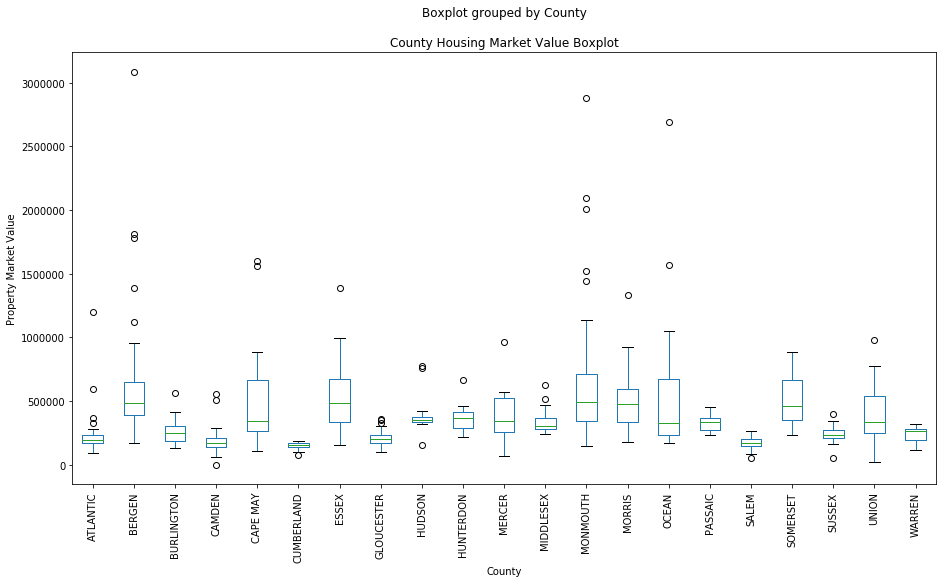

In [53]:
#Create boxplot by county for median housing value

county_tax_mktval_summary.boxplot(by ='County', column =['Mean Market Value'], grid = False , figsize=(15,8)) 

#Add titles and rotate x ticks

plt.xticks(rotation=90)
plt.title("County Housing Market Value Boxplot")
plt.xlabel("County")
plt.ylabel("Property Market Value")

#Save figure as png file

plt.savefig('County Property Value Boxplot.png')

#Show Boxplot

plt.show()